# Data Preparation & Exploration 

In [26]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%pylab inline
from datetime import datetime
import phik
from phik.report import plot_correlation_matrix
from phik import report
import pickle 
import warnings
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# loading Datasets

In [2]:

train = pd.read_csv("ctr_dataset_train.csv")

## Get on overview of the train set (This might be slow)

In [3]:

profile = ProfileReport(train)
profile

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,14
Number of observations,2519056
Total Missing (%),4.4%
Total size in memory,235.4 MiB
Average record size in memory,98.0 B
Numeric,3
Categorical,8
Boolean,1
Date,0
Text (Unique),1
Rejected,1


In [4]:
test_df = pd.read_csv("ctr_dataset_test.csv")


In [5]:
profile = ProfileReport(test_df)
profile

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,629764
Total Missing (%),4.7%
Total size in memory,58.3 MiB
Average record size in memory,97.0 B
Numeric,3
Categorical,8
Boolean,0
Date,0
Text (Unique),1
Rejected,1


### Checking if "op_ids" in the train apear also in the test

In [6]:
joined = pd.merge(test_df, train, on = 'op_id')

In [7]:
joined.shape[0]

0

####  Ok so we know the test set and train set do not share op_ids hence op_id is useless

In [8]:
test_df.columns

Index(['op_id', 'timestamp', 'state', 'user_isp', 'app_id', 'app_cat',
       'banner_pos', 'manufacturer', 'device_model', 'device_version',
       'device_height', 'device_width', 'resolution'],
      dtype='object')

In [9]:
categicals = ['clicked','state', 'user_isp', 'app_cat',
       'banner_pos', 'manufacturer', 'device_model', 'device_version']

### lets look at pairwise correlations between categorical vairables using Phi Correlation (this is slow)

In [12]:
with warnings.catch_warnings(record=True):
    phik_overview = train[['clicked','state', 'user_isp', 'app_cat',
       'banner_pos', 'manufacturer', 'device_model', 'device_version']].phik_matrix()
phik_overview.round(2)

var2,app_cat,banner_pos,clicked,device_model,device_version,manufacturer,state,user_isp
var1,,,,,,,,
app_cat,1.00,0.02,0.10,0.42,0.17,0.17,0.13,0.55
banner_pos,0.02,1.00,0.28,0.03,0.01,0.02,0.01,0.01
clicked,0.10,0.28,1.00,0.11,0.04,0.08,0.02,0.03
device_model,0.42,0.03,0.11,1.00,0.97,1.00,0.65,NaN
device_version,0.17,0.01,0.04,0.97,1.00,0.83,0.12,0.34
manufacturer,0.17,0.02,0.08,1.00,0.83,1.00,0.21,0.83
state,0.13,0.01,0.02,0.65,0.12,0.21,1.00,0.95
user_isp,0.55,0.01,0.03,NaN,0.34,0.83,0.95,1.00


#### We note:
1. banner_pos, device_model, app_cat & manufacturer are the most promising categorical features, pair-wise
2. device version is  correlted with device model 
3. user_isp is highly correlated with state and both are with low correlaton to the outcome so we can ignore one of them

### plot some pair wise interactions for variables with a high correlation with y

In [22]:
def pair_wise_plot(col):
    fig = plt.figure(figsize=(8,8))
    #sns.countplot(y= train_df['clicked'], hue = train_df[col]).set_title(col+'  VS. clicked')
    sns.catplot(x="clicked", y=col, hue=col, data=train.sample(n=100000))
    

<Figure size 800x800 with 0 Axes>

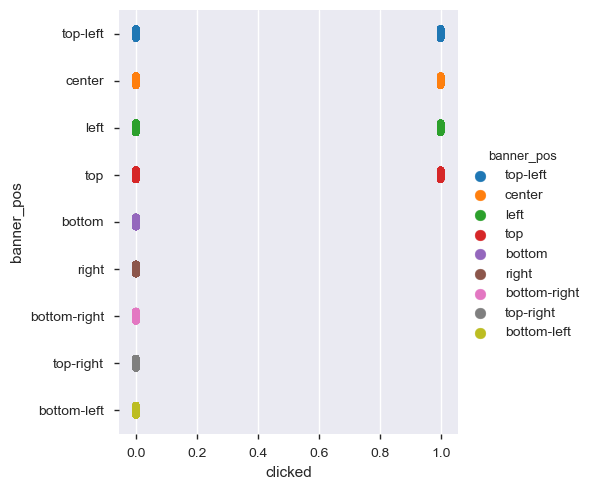

In [23]:
pair_wise_plot('banner_pos');

<Figure size 800x800 with 0 Axes>

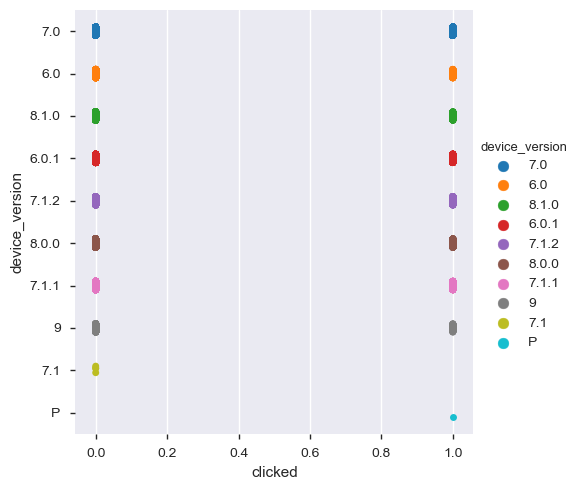

In [24]:
pair_wise_plot('device_version');

# remove useless columns to save space & time

In [15]:
test_df.drop(columns=['op_id', 'resolution'], inplace=True)
train.drop(columns=['op_id', 'resolution'], inplace=True)

In [ ]:
# split to train (80%), validation(10%)  & dev test(10%)  data sets

In [31]:
train_df, other = train_test_split(train, test_size=0.2, random_state=42)
dev_val, dev_test = train_test_split(other, test_size=0.5, random_state=42)

In [32]:
 train_df.shape, dev_val.shape, dev_test.shape

((2015244, 12), (251906, 12), (251906, 12))

## Store all Dataframes as pickle for quick loading in downstream notebooks

In [33]:
test_df.to_pickle('test_set.pickle')
train_df.to_pickle('train_set.pickle')
dev_val.to_pickle('val_test.pickle')
dev_test.to_pickle('dev_test.pickle')